In [43]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import concatenate_videoclips, VideoFileClip
from moviepy.video.io.ImageSequenceClip import ImageSequenceClip
from google.colab import files

# Environment setup and discretization function

In [44]:
env = gym.make('CartPole-v1')

def discretize_state(state, bins):
    state_bins = [
        np.linspace(-4.8, 4.8, bins),  # cart position
        np.linspace(-4, 4, bins),     # cart velocity
        np.linspace(-0.418, 0.418, bins), # pole angle
        np.linspace(-4, 4, bins)      # pole angular velocity
    ]
    return tuple(np.digitize(state[i], state_bins[i]) for i in range(len(state)))


# Hyperparameters and initialization of the Q-table

In [45]:
bins = 20
alpha = 0.05
gamma = 0.995
epsilon = 1.0
epsilon_decay = 0.999
min_epsilon = 0.01
episodes = 30000
interval = 500
video_interval = 5000

num_states = (bins,) * 4
num_actions = env.action_space.n
Q = np.zeros(num_states + (num_actions,))

rewards_per_episode = []
average_rewards = []
intervals = []
video_files = []


# Training loop

In [46]:
for episode in range(episodes):
    state = discretize_state(env.reset(), bins)
    done = False
    total_reward = 0

    while not done:
        if np.random.random() < epsilon:
            action = env.action_space.sample() # exploration
        else:
            action = np.argmax(Q[state]) # exploitation

        next_state_raw, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state_raw, bins)
        total_reward += reward

        best_next_action = np.argmax(Q[next_state])
        Q[state][action] += alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])

        state = next_state

    rewards_per_episode.append(total_reward)

    if (episode + 1) % interval == 0:
        avg_reward = np.mean(rewards_per_episode[-interval:])
        average_rewards.append(avg_reward)
        intervals.append(episode + 1)

    if (episode + 1) % video_interval == 0:
        frames = []
        eval_state = discretize_state(env.reset(), bins)
        eval_done = False

        while not eval_done:
            frame = env.render(mode='rgb_array')
            frames.append(frame)

            eval_action = np.argmax(Q[eval_state])
            eval_state_raw, _, eval_done, _ = env.step(eval_action)
            eval_state = discretize_state(eval_state_raw, bins)

        video_filename = f"evaluation_video_{episode + 1}.mp4"
        video_clip = ImageSequenceClip(frames, fps=30)
        video_clip.write_videofile(video_filename, codec="libx264")

        video_files.append(video_filename)

    epsilon = max(min_epsilon, epsilon * epsilon_decay) # decay epsilon

video_clips = [VideoFileClip(clip) for clip in video_files]
final_video_clip = concatenate_videoclips(video_clips)

final_video_path = "final_video.mp4"
final_video_clip.write_videofile(final_video_path, codec="libx264")

files.download(final_video_path)


t: 100%|██████████| 1993/1993 [1:31:19<00:00, 124.48it/s, now=None]

Moviepy - Building video evaluation_video_5000.mp4.
Moviepy - Writing video evaluation_video_5000.mp4




t: 100%|██████████| 1993/1993 [1:31:22<00:00, 124.48it/s, now=None]

Moviepy - Done !
Moviepy - video ready evaluation_video_5000.mp4


t: 100%|██████████| 1993/1993 [1:36:34<00:00, 124.48it/s, now=None]

Moviepy - Building video evaluation_video_10000.mp4.
Moviepy - Writing video evaluation_video_10000.mp4




t: 100%|██████████| 1993/1993 [1:36:36<00:00, 124.48it/s, now=None]

Moviepy - Done !
Moviepy - video ready evaluation_video_10000.mp4


t: 100%|██████████| 1993/1993 [1:42:31<00:00, 124.48it/s, now=None]

Moviepy - Building video evaluation_video_15000.mp4.
Moviepy - Writing video evaluation_video_15000.mp4




t: 100%|██████████| 1993/1993 [1:42:33<00:00, 124.48it/s, now=None]

Moviepy - Done !
Moviepy - video ready evaluation_video_15000.mp4


t: 100%|██████████| 1993/1993 [1:48:46<00:00, 124.48it/s, now=None]

Moviepy - Building video evaluation_video_20000.mp4.
Moviepy - Writing video evaluation_video_20000.mp4




t: 100%|██████████| 1993/1993 [1:48:50<00:00, 124.48it/s, now=None]

Moviepy - Done !
Moviepy - video ready evaluation_video_20000.mp4


t: 100%|██████████| 1993/1993 [1:54:47<00:00, 124.48it/s, now=None]

Moviepy - Building video evaluation_video_25000.mp4.
Moviepy - Writing video evaluation_video_25000.mp4




t: 100%|██████████| 1993/1993 [1:54:49<00:00, 124.48it/s, now=None]

Moviepy - Done !
Moviepy - video ready evaluation_video_25000.mp4


t: 100%|██████████| 1993/1993 [2:00:50<00:00, 124.48it/s, now=None]

Moviepy - Building video evaluation_video_30000.mp4.
Moviepy - Writing video evaluation_video_30000.mp4




t: 100%|██████████| 1993/1993 [2:00:53<00:00, 124.48it/s, now=None]

Moviepy - Done !
Moviepy - video ready evaluation_video_30000.mp4


t: 100%|██████████| 1993/1993 [2:00:54<00:00, 124.48it/s, now=None]

Moviepy - Building video final_video.mp4.
Moviepy - Writing video final_video.mp4




t: 100%|██████████| 1993/1993 [2:01:11<00:00, 124.48it/s, now=None]

Moviepy - Done !
Moviepy - video ready final_video.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Plot average rewards

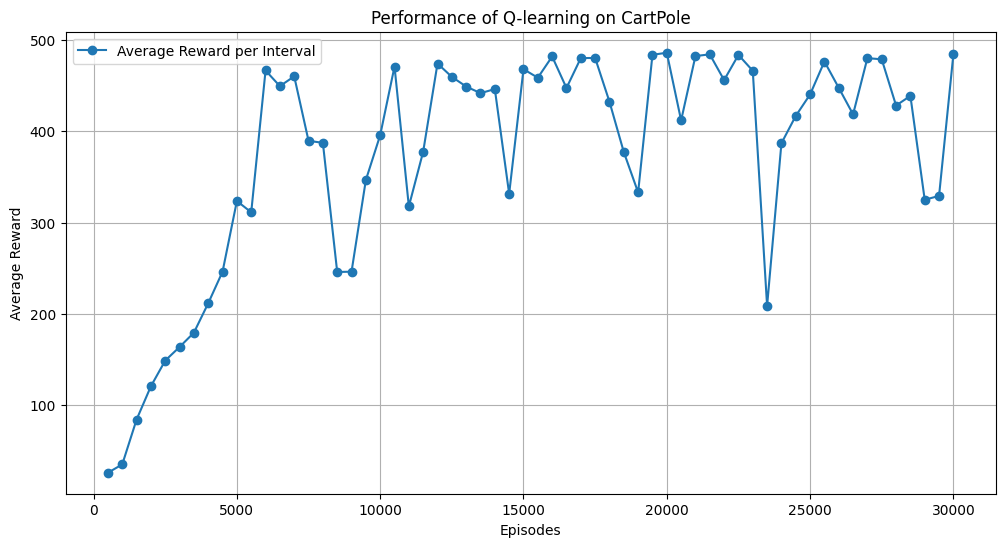

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(intervals, average_rewards, marker='o', label="Average Reward per Interval")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Performance of Q-learning on CartPole")
plt.legend()
plt.grid()
plt.show()

# Plot max Q-value over episodes

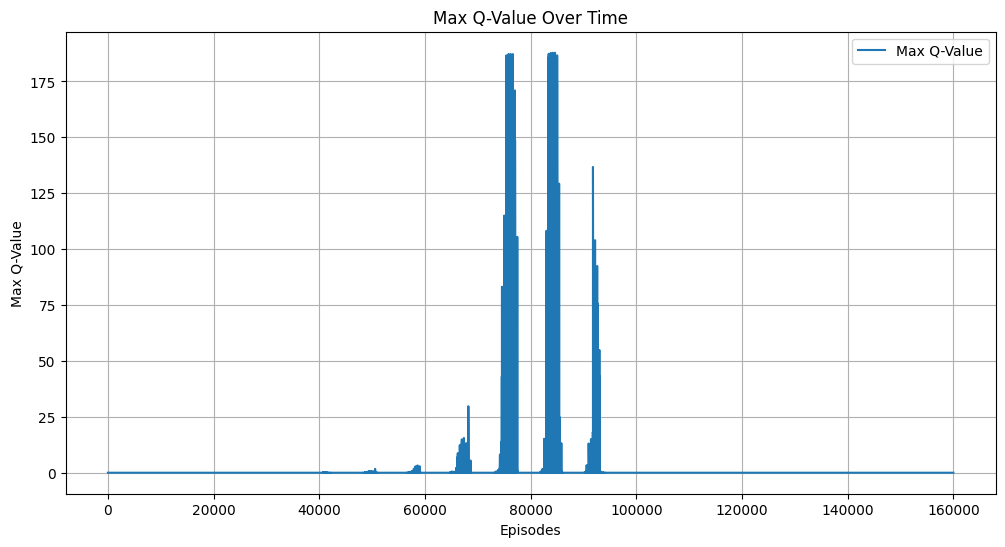

In [48]:
max_q_values = []
for state in np.ndindex(Q.shape[:-1]):
    max_q_values.append(np.max(Q[state]))

plt.figure(figsize=(12, 6))
plt.plot(max_q_values, label="Max Q-Value")
plt.xlabel("Episodes")
plt.ylabel("Max Q-Value")
plt.title("Max Q-Value Over Time")
plt.legend()
plt.grid()
plt.show()


# Plot episode length

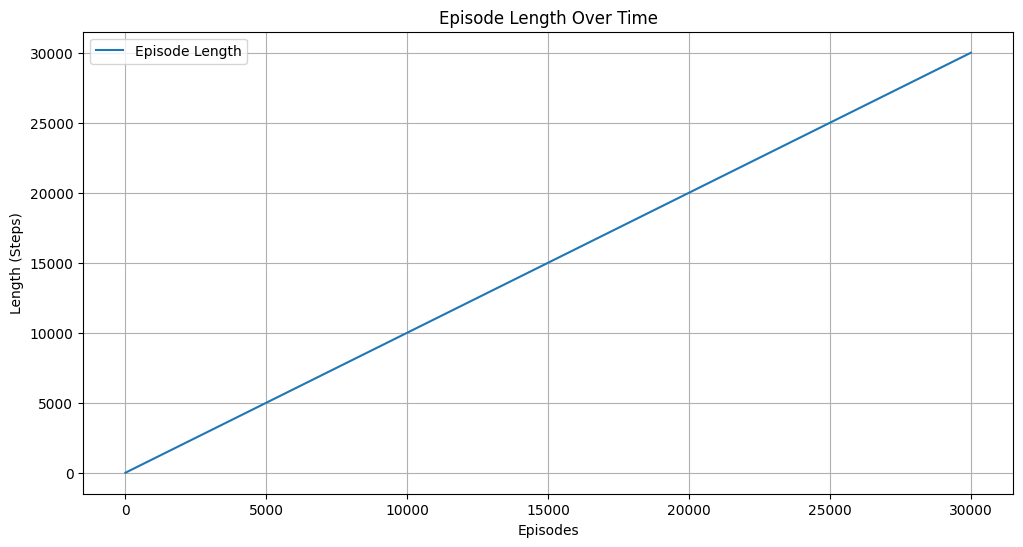

In [49]:
episode_lengths = [len(np.where(np.array(rewards_per_episode[:i + 1]) > 0)[0]) for i in range(len(rewards_per_episode))]

plt.figure(figsize=(12, 6))
plt.plot(episode_lengths, label="Episode Length")
plt.xlabel("Episodes")
plt.ylabel("Length (Steps)")
plt.title("Episode Length Over Time")
plt.legend()
plt.grid()
plt.show()
